In [9]:
import subprocess
subprocess.run(['jupyter', 'nbconvert', '--to', 'python', 'read_tfrecord.ipynb'])

CompletedProcess(args=['jupyter', 'nbconvert', '--to', 'python', 'read_tfrecord.ipynb'], returncode=0)

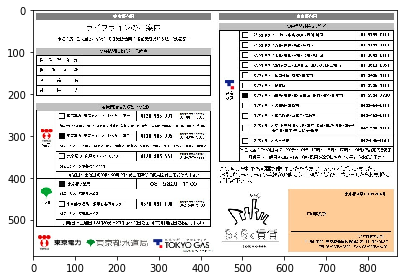

In [7]:
# TFRecord形式ファイルの読み込み
#-*- coding:utf-8 -*-

import tensorflow as tf
from skimage import io

#TFRecord形式のパース処理
def parse(example):

    #TFRecordをパース
    features = tf.parse_single_example(
        example,
        features={
            'data': tf.FixedLenFeature([], dtype=tf.string)
        }
    )
    #バイト列のままになっているので、元の画像に変換
    img = features['data']
    img = tf.image.decode_jpeg(img)
    return img


#TFRecordファイルを読み込みパース用の関数を適用
dataset = tf.data.TFRecordDataset(['test.tfrecord']).map(parse)

#データセットを１週するイテレータ
iterator = dataset.make_one_shot_iterator()
#イテレータから要素を取得
next_element = iterator.get_next()

with tf.Session() as sess:
    #データセットから画像を１件取得
    jpeg_img = sess.run(next_element)
    #scikit-imageで表示
    io.imshow(jpeg_img)
    io.show()